# Using the Perceptron Algorightm to Extract Sentiment from Movie Reviews

This project is part of the course work for [Dr. Nikos Altras](https://www.sheffield.ac.uk/dcs/people/academic/naletras/profile)'s class Natural Language processing.

The goal of this project is to implement the **binary perceptron algorithm** and to apply it to sentiment analysis of movie reviews. The data set used for this analysis can be found [here](http://www.cs.
cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz) and it contains 1000 positive and 1000 negative movie reviews. 

This report is structured as follow: 
* first, I will briefly introduce the perceptron algorithm and explain how it works. 
* Second, I will explain how the algorithm was used to extract the sentiment of movie reviews. 
* Last, I will program the program and discuss my analysis and results.


### The Perceptron Algorithm

The perceptron is a classic learning algorithm for neural model of learning and it is used for learning features’ weights. The algorithm has two main characteristics:

*  It is online: This means that instead of considering the entire data set at once, the algorithm considers and processes one instance at a time before moving on to the next one.
*  It is error based: This means that the algorithm learns only when it is wrong. In other words, if the algorithm is doing well, it does not update its parameters. The parameters are updated only when the algorithm is wrong.


The algorithm has a training and a testing phase. The training phase starts by assigning the value of zero to each feature weight. This zero weight vector, along with the labeled training set, is fed into the perceptron training algorithm. For any given example of the training set, the algorithm makes a prediction using a prediction function and checks if the prediction is correct. If it is, it does nothing. If it is wrong, the algorithm changes the parameters (in this case the feature weights) in such a way that it would be right next time around in the same example. It then goes to the next example, repeats the procedure, and continues until the end of the data set. At this point the algorithm will loop back around for a pre-specified number of iterations. After the multiple passes through the data set, the algorithm returns a vector of updated weights.

The performance of the algorithm is assessed in the testing phase. This time, the algorithm will use the updated features weights returned in the training phase and make prediction over an unseen data set. Accuracy is then returned by calculating the number of correctly classified instances over the the total number of examples in the data set.


### Perceptron to Predict Sentiment of Movie Reviews

Each review in the data set is labelled (+1) when positive and (-1) when negative. In this specific case, in its training phase, the perceptron aims at updating the weight of each word that make up the movie review.
The idea is that each review is made of a selection of words. Each word has a weight and a frequency. The score of a word is its weight multiplied by its frequency. The overall score of a review is made up of the sum of each score of each word in the review.

To make a prediction, the algorithm calculates the score for each review and uses the sign function (sign(score)) to return +1 if the score is positive or -1 if the score is negative. The training algorithm will use these predictions to update the weight of each word. The testing algorithm assesses whether the updated weights make a correct prediction on unseen data or not.

### Model the Perceptron Algorithm

In [2]:
# required packages
import os
import re
from collections import Counter
import numpy as np
from random import shuffle
from random import seed
import matplotlib.pyplot as plt
from operator import itemgetter
from datetime import datetime

In [9]:

counter_all = []
list_of_dictionaries = []

# create variables with path for positive and negative files
pospath = "./review_polarity/txt_sentoken/pos"
negpath = "./review_polarity/txt_sentoken/neg"


# function that reads the data from the directory and returns a list of text.
def read_text(filepath):
    text_list = []
    for file in os.listdir(filepath):
        # generate the full file path
        fp = os.path.join(filepath, file)
        # append in list paths
        with open(fp, "r") as infile:
            # read file
            text = infile.read()
            text = text.lower()
            text_list.append(text)
    return text_list


# function that generates ngrams.
# function taken from here: http://www.albertauyeung.com/post/generating-ngrams-python/
def generate_ngrams(s, n=1):
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)

    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]

    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]


# function that generate word frequencies
def get_BOW(label, n=1):
    # select the file path depending on the label
    if label == 1:
        filepath = pospath
    else:
        filepath = negpath

    repository = []
    # read data and return text list
    text_list = read_text(filepath)

    # for each text in the list,
    for text in text_list:
        # create empty dictionary
        dictionary = {}

        # create bag of words with counter
        counter = Counter(generate_ngrams(text, n))

        # append word counter to the dictionary
        dictionary['words'] = counter

        # label text and attach to dictionary
        dictionary['label'] = label

        # append counter to list of counters
        counter_all.append(counter)
        repository.append(counter)

        # append dictionary to list of all dictionaries
        list_of_dictionaries.append(dictionary.copy())
    return repository


# function that generates zero weights

def zero_weights(train_list):
    w_dict = {}
    # for each counter in the list,
    for BOW in train_list:
        # for each word, count in each counter
        for word in BOW['words']:
            # take the word and assign it a weight of 0
            w = {word: 0.0}
            # update each word into the empty w_dict
            w_dict.update(w)
    return w_dict


# function that calculates the accuracy of the binary perceptron/test function
# the imput of this dunction will be the test set and the updated weights.
# the test set is given in the form of a list of dictionaries containing
# labelled test text

def binary_perceptron(dict_list, W):
    correct = 0.0
    # for each element of the list
    for dictionary in dict_list:
        y = dictionary['label']
        score = 0.0
        # for each work in the element
        for word in dictionary['words']:
            # calculate word score
            score += dictionary['words'][word] * W[word]
            # print(score)
            # print("positive") if score >= 0.0 else print("negative")

        # make score either positive or negative
        score = np.sign(score)
        if score == 0:
            score = 1
        if score == y:
            correct += 1
        else:
            continue
    # calculate correct instances over all instances
    accuracy = correct / (int(len(dict_list)))
    # return accuracy
    return accuracy


# function that updates the weights / trains the model
# the imput of the function will be the training dataset and the zero weights dictionary
def update_weights(train_list, W):
    # for each text in the list
    for dictionary in train_list:
        y = dictionary['label']
        y_hat = 0.0
        # for each word in the text
        for word in dictionary['words']:
            # calculate prediction score for the word
            y_hat += dictionary['words'][word] * W[word]

        # make the prediction either 1 or -1
        if y_hat >= 0:
            y_hat = 1
        else:
            y_hat = -1

        # if the prediction is different than the actual label,
        if y_hat != y:
            # if the actual label is 1
            if y == 1:
                # update the weight by adding the word frequency to it
                for word in dictionary['words']:
                    W[word] += dictionary['words'][word]
            # else subtract
            else:
                for word in dictionary['words']:
                    W[word] -= dictionary['words'][word]
    # return the updated weights
    return W


# function that updates the weights while shuffling the data
def update_weights_shuffle(dict_list, W):
    seed(3333)  # set seed so that results are reproducible
    shuffle(dict_list)  # shuffle
    shuffled = update_weights(dict_list, W)  # update
    return shuffled


# function that updates the weights from shuffled data and with multiple passes
def update_weights_iterations(dict_list, W, iterations=10):
    for i in range(iterations + 1):
        shuffled = update_weights_shuffle(dict_list, W)
    return shuffled


# this function returns a list of accuracy after each iteration
def print_accuracy(train_set, test_set, W, iterations):
    accuracies = []
    for i in range(iterations + 1):
        update = update_weights_shuffle(train_set, W)
        accuracy = binary_perceptron(test_set, update)
        accuracies.append(accuracy)
    return accuracies


# this function return the average weight after n iterations
def get_average_weights(dict_list, W, iterations=10):
    # create list of dictionaries
    ws = []
    for i in range(iterations + 1):
        shuffled = update_weights_shuffle(dict_list, W)
        # once the wrights are updated, append them to the list of dictionaries
        ws.append(shuffled.copy())

    # take average of values of dictionaries from the list
    # code from stackoverflow
    # https://stackoverflow.com/questions/34139512/average-value-in-multiple-dictionaries-based-on-key-in-python
    sums = Counter()
    counters = Counter()
    for itemset in ws:
        sums.update(itemset)
        counters.update(itemset.keys())

    avg = {x: float(sums[x]) / counters[x] for x in sums.keys()}

    # return average
    return avg

def initialize(n=1):
    pos = get_BOW(label = 1, n = 1)
    neg = get_BOW(label = -1, n= 1)
    return pos, neg

#### Algorithm Execution

* Read, label and tokienize movie reviews depending on the model used (unigram, bigram or trigram). 

In [12]:
pos_BOW, neg_BOW = initialize( n = int(input('type 1 for unigrams, 2 for bigrams, 3 for trigrams')))

type 1 for unigrams, 2 for bigrams, 3 for trigrams1


* assign a weight of zero to each word in the corpus using the function declared above. I want to check that if i run the perceptron model, I will onyl get 50% accuracy

In [13]:
# create dictionary of zero weights
zero_weight = zero_weights(list_of_dictionaries)
# get accuracy with 0 weights
pred = binary_perceptron(list_of_dictionaries, zero_weight)
# check accuracy with 0 weights
print('Accuracy Score with zero weights is: ', str(pred * 100), "%\n")

Accuracy Score with zero weights is:  50.0 %



* It is now time to update the weights of the words to improve our accuracy. First, we need to create a test set and a training set. 

In [14]:
# merge training positive and negative dictionaries to form traning and test set.
train_set = list_of_dictionaries[0:800] + list_of_dictionaries[1000:1800]
test_set = list_of_dictionaries[800:1000] + list_of_dictionaries[1800:2000]

* Let's update the word weights of the training set and check if accuracy improved. Here weights were updated by passing into the algorithm the training instances once and in the order they were sampled (first 800 were positive, last 800 were negative reviews). 

In [15]:
# update the weights
new_W = update_weights(train_set, zero_weight)
# check accuracy
pred_new_W = binary_perceptron(test_set, new_W)
print('Accuracy Score when weights are updated is: ', str(pred_new_W * 100), '%\n')

Accuracy Score when weights are updated is:  50.0 %



* Accuracy remained at 50% since the algorithm did not update for the first 800 observations. Accuracy might improve if we shuffle the training instances before updating them. 

In [16]:
new_W_SH = update_weights_shuffle(train_set,
                                  zero_weights(list_of_dictionaries))  # update the weights with shuffle function
pred_new_W_sh = binary_perceptron(test_set, new_W_SH)  # check accuracy
print('Accuracy score with shuffled data is: ', str(pred_new_W_sh * 100), '%\n')


Accuracy score with shuffled data is:  63.5 %



* Accuracy level increased to 63.5 percent. Let's improve the algorithm further by introducting iterations. In this case, the training instances will be shuffled and updated 15 times. 

In [17]:

iterations = 15  # update w  with 15 iterations
new_W_iter = update_weights_iterations(train_set, zero_weights(list_of_dictionaries), iterations)
pred_new_W_iter = binary_perceptron(test_set, new_W_iter)  # check accuracy
print(
'Accuracy score with shuffled data and calculated over ', str(iterations), ' iterations: ', str(pred_new_W_iter * 100),
'%\n')


Accuracy score with shuffled data and calculated over  15  iterations:  83.5 %



* Accuracy improved considerably. The graph below shows the learning progress of the algorithm at each iteration

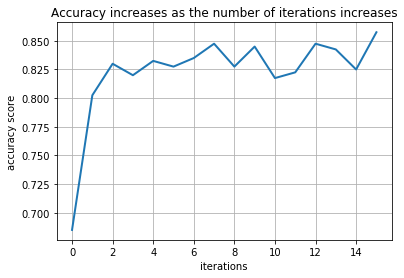

In [18]:

# make grath to show the learning process at each iteration
x = list(range(iterations + 1))  # put iterations on the x axis
y = print_accuracy(train_set, test_set, zero_weights(list_of_dictionaries),
                   iterations)  # put accuracy scores on the y axis
## plot the accuracy per iteration.
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('accuracy score')
plt.title('Accuracy increases as the number of iterations increases')
plt.grid(True)
ax.plot(x, y, '-', lw=2)

# save image in directory
directory = './review_polarity/txt_sentoken/'
plt.savefig(directory + 'image.png', dpi=300)
# show graph
plt.show()



* Other than using the last value of the weights after 15 iterations, we can make predictions with the average of each word's score.

In [19]:
new_W_av = get_average_weights(train_set, zero_weights(list_of_dictionaries), iterations)  # update w
pred_new_W_avg = binary_perceptron(test_set,
                                   new_W_av)  # make new prediction and check for accuracy
print('Accuracy Score with weights averaged over ', str(iterations), ' iterations: ', str(pred_new_W_avg * 100), '% \n')


Accuracy Score with weights averaged over  15  iterations:  84.75 % 



* When we average the words' weights, the model is accurate 84.75% of the time. 

* finally, we can check the algorithm is working correctly by returning the top most positive words and the top most negative words. 

In [21]:
# what are the most positive and the most negative words?
positive = sorted(new_W_av.items(), key=itemgetter(1))[::-1]
negative = sorted(new_W_av.items(), key=itemgetter(1))
print('Top 10 positive Words: ', positive[:10], '\n')
print('Top 10 negative words: ', negative[:10], '\n')


Top 10 positive Words:  [('well', 183.625), ('most', 156.625), ('seen', 156.4375), ('see', 153.5), ('quite', 152.8125), ('great', 149.5625), ('fun', 140.0), ('american', 135.0625), ('also', 133.5625), ('best', 128.6875)] 

Top 10 negative words:  [('bad', -341.125), ('only', -211.5), ('worst', -193.5), ('plot', -178.25), ('could', -168.875), ('script', -151.8125), ('boring', -150.8125), ('supposed', -141.875), ('any', -140.4375), ('looks', -132.875)] 

